# BUILDING A CLASSIFICATION MODEL USING PRINCIPAL COMPONENT ANALYSIS (PCA) ON TAIWAN CREDIT CARD CLIENTS 


# INTRODUCTION:

The Principal Component Analysis (PCA) is a popular unsupervised learning technique for reducing the dimensionality of data. It increases interpretability yet, at the same time, it minimizes information loss. It helps to find the most significant features in a dataset and makes the data easy for plotting these features. It has nothing concerned with the target variable (Y) and focuses entirely on reducing the dimensions of feature variables. (X) 

# DATA DESCRIPTION:

This research aims at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. The result of predictive accuracy of the estimated probability of default is more valuable with the binary result of classification - credible or not credible clients. The dataset contains a binary variable, default payment (Yes = 1, No = 0), as the response variable which is supported by 23 features.


# ATTRIBUTE INFORMATION:

1. X1 (Limit_Bal): Amount of the given credit (NT dollar)
2. X2: Sex (1 = male; 2 = female)
3. X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
4. X4: Marital status (1 = married; 2 = single; 3 = others).
5. X5: Age (year).

X6 - X11 : History of past payment; past monthly payment records (from April to September, 2005) as follows

    X6   : the repayment status in September, 2005
    X7   : the repayment status in August, 2005
  
  . .       . . .    . . .    . . .
  
    X11   : the repayment status in April, 2005.

The measurement scale for the repayment status is:
  
    -1  :  pay duly
    
    1  :  payment delay for one month
    
    2  :  payment delay for two months

    . .     . . .    . . .    . . .

    8  :  payment delay for eight months

    9  :  payment delay for nine months and above.

X12-X17 : Amount of bill statement (NT dollar)

  X12   : amount of bill statement in September, 2005

  X13   : amount of bill statement in August, 2005

  . . .       . . .    . . .    . . .

  X17   : amount of bill statement in April, 2005.

X18-X23 : Amount of previous payment (NT dollar).

  X18   : amount paid in September, 2005

  X19   : amount paid in August, 2005;

  . . .      . . .    . . .    . . .

  X23   : amount paid in April, 2005.
  
  
**NEGATIVE BILL AMOUNT MEANS THAT THE CREDIT CARD COMPANY OWES MONEY TO THE CUSTOMER AS HE/SHE HAS PAID IN EXCESS**.

**ALL THE AMOUNTS ARE IN NT DOLLARS (TAIWAN DOLLAR)**

# OBJECTIVE:

The objective is to build a classification model by reducing the dimension and multicollinearity using the technique of Principal Component Analysis (PCA). The dataset is compared by employing three models and comparing their accuracy meausres to select the best model.

The Exploratory Data Analysis (EDA) begins with importing the required libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("default_of_credit_card_clients.xlsx")
df.head() #gives the top 5 description of the dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# DESCRIPTIVE ANALYSIS

In [16]:
d=df.drop(['ID'],axis=1)
d.head()

print(d.shape) #gives the count of rows and columns
print("")
print(d.columns) #gives column details
print("")
print(d.describe()) #gives summary statistics of the data
print("")
print(d.info()) #gives datatype of each variable
print("")
print(d.isnull().sum()) #shows if there's any null value in the dataset
print("")
print(d['default payment next month'].value_counts())

(30000, 24)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.0000

1. After dropping the unnecessary column of 'ID', the refined dataset contains 30,000 rows and 24 columns.
2. The target variable (Y)- default payment is binary categorical datatype.
3. There are no null values in the dataset. Hence, data cleaning is not required here.
4. The independent variables (features) are of mixed type- category plus continuous.
5. Out of a total of 30,000 customers, the number of non-defaulters (0) is 23,363 and the number of defaulters (1) is 6,637.

# DATA VIZUALIZATION

In [4]:
d.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.248314,-0.279479,-0.273648,-0.257919,-0.242653,...,0.294006,0.295301,0.290472,0.195236,0.178404,0.210167,0.203248,0.217199,0.219582,-0.153560
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.050091,-0.064054,-0.059441,-0.056547,-0.052612,...,-0.021852,-0.016844,-0.016798,-0.000242,-0.001398,-0.008597,-0.002187,-0.001677,-0.002753,-0.040058
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.100789,0.113162,0.103512,0.098853,0.087620,...,-0.000454,-0.007434,-0.008975,-0.037456,-0.030040,-0.039943,-0.038182,-0.040361,-0.037188,0.028019
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.013206,0.017232,0.025621,0.025536,0.026742,...,-0.023360,-0.025269,-0.021209,-0.005979,-0.008084,-0.003541,-0.012688,-0.001216,-0.006629,-0.024269
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.029803,-0.040823,-0.044137,-0.039941,-0.044646,...,0.051376,0.049452,0.047553,0.026147,0.021790,0.029247,0.021392,0.022853,0.019481,0.013815
PAY_0,-0.248314,-0.050091,0.100789,0.013206,-0.029803,1.000000,0.668103,0.545119,0.510106,0.479601,...,0.154655,0.158460,0.155733,-0.085348,-0.070290,-0.074990,-0.064845,-0.058259,-0.059231,0.348494
PAY_2,-0.279479,-0.064054,0.113162,0.017232,-0.040823,0.668103,1.000000,0.715964,0.604400,0.567186,...,0.187256,0.189291,0.188658,-0.107332,-0.067446,-0.068430,-0.053738,-0.045045,-0.045920,0.293312
PAY_3,-0.273648,-0.059441,0.103512,0.025621,-0.044137,0.545119,0.715964,1.000000,0.727571,0.630321,...,0.185972,0.187233,0.186350,-0.017486,-0.091421,-0.068521,-0.055875,-0.046181,-0.046763,0.263347
PAY_4,-0.257919,-0.056547,0.098853,0.025536,-0.039941,0.510106,0.604400,0.727571,1.000000,0.778107,...,0.200095,0.200377,0.199078,-0.028778,-0.018922,-0.100774,-0.060343,-0.047234,-0.038554,0.246318
PAY_5,-0.242653,-0.052612,0.087620,0.026742,-0.044646,0.479601,0.567186,0.630321,0.778107,1.000000,...,0.226866,0.225399,0.221071,-0.025110,-0.016887,-0.011851,-0.093982,-0.049667,-0.037004,0.236172


<AxesSubplot:>

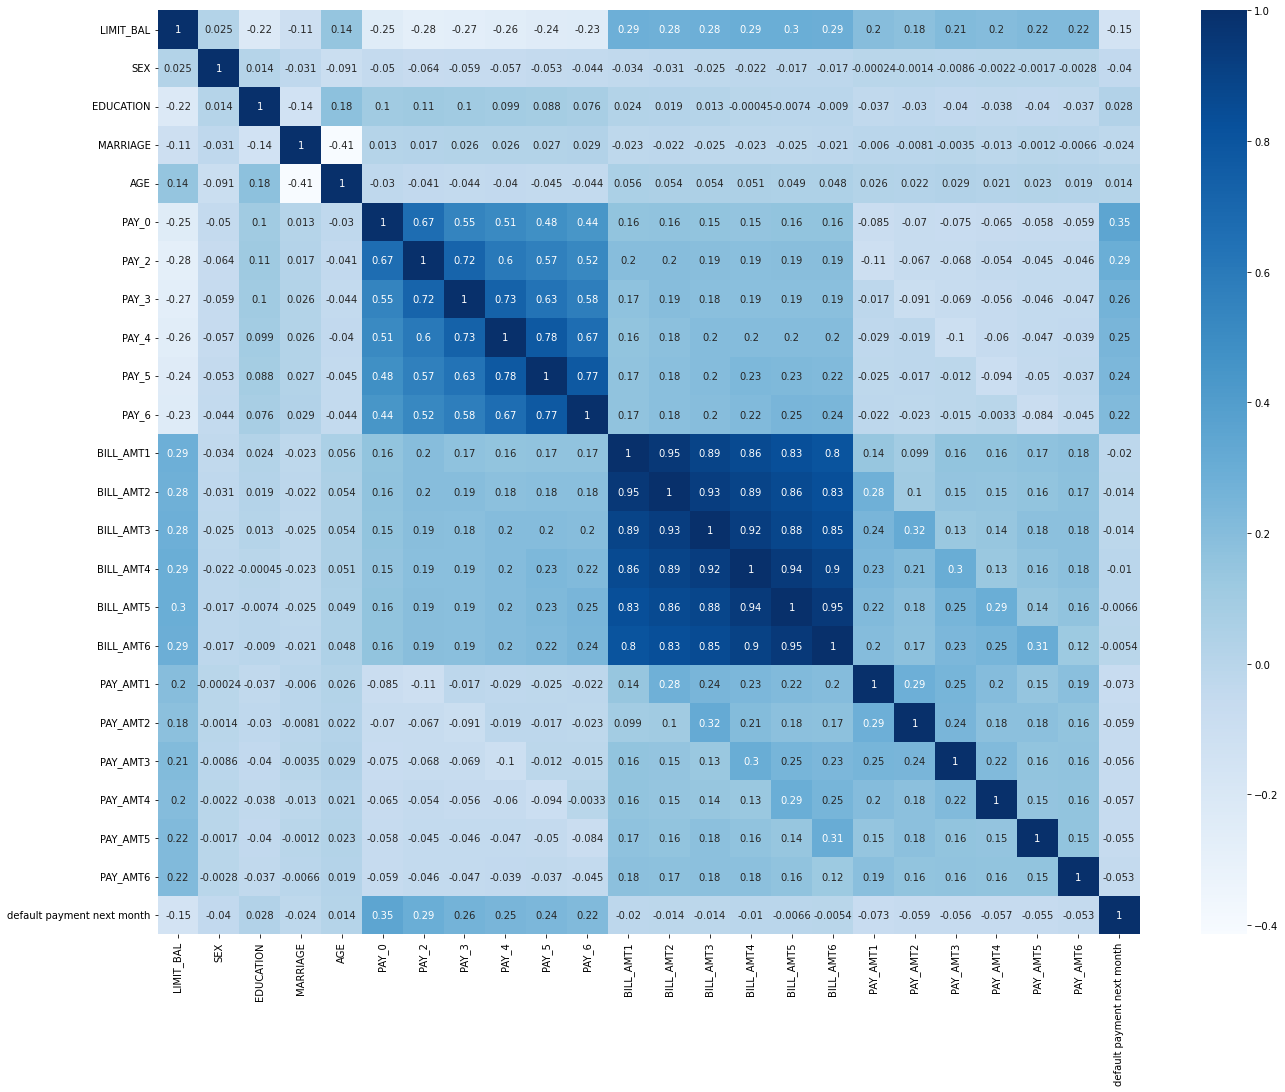

In [5]:
#heatmap
plt.figure(figsize=(22,17))
sns.heatmap(d.corr(), annot=True,cmap="Blues")

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

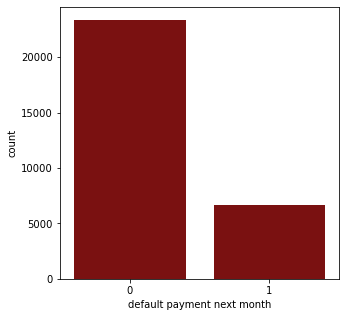

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(data=d, x="default payment next month",color="darkred")

Text(0.5, 1.0, 'Countplot of Gender-wise Credit Card Payments')

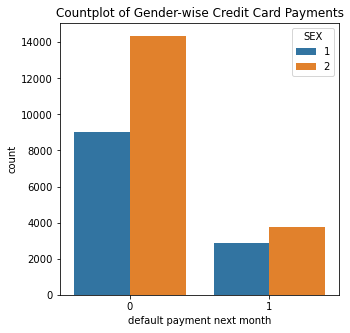

In [14]:
#countplot of gender and default payments 
plt.figure(figsize=(5,5))
sns.countplot(data=d, x="default payment next month", hue="SEX")
plt.title("Countplot of Gender-wise Credit Card Payments")

The first countplot shows how the number of non-defaulters surpass the number of defaulters. 
The second countplot shows this distribution of defaulters and non-defaulters with repect to genders. It is seen that within the total number of non-dafaulters (0), the count of females (2) is higher than the males (1). The same is seen in the defaulters (1).  

After data vizualization, the next thing is **Ordinal Encoding** to convert categorical features into integer values.

# ORDINAL ENCODING

In [24]:
from sklearn import preprocessing
ordinal_encoder = preprocessing.OrdinalEncoder() 
X=d[['SEX','EDUCATION','MARRIAGE']]
X=ordinal_encoder.fit_transform(X)
X = pd.DataFrame(X)

In [78]:
df = d.drop(['SEX','EDUCATION','MARRIAGE'], axis=1)
df.shape

(30000, 21)

In [27]:
df = df.join(X)
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,0,1,2
0,20000,24,2,2,-1,-1,-1,-1,3913,3102,...,0,689,0,0,0,0,1,1.0,2.0,1.0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,1000,1000,1000,0,2000,1,1.0,2.0,2.0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1518,1500,1000,1000,1000,5000,0,1.0,2.0,2.0
3,50000,37,0,0,0,0,0,0,46990,48233,...,2000,2019,1200,1100,1069,1000,0,1.0,2.0,1.0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,2000,36681,10000,9000,689,679,0,0.0,2.0,1.0


Next, the data is split into training and testing for building the appropriate model.

# SPLITTING THE DATA INTO TRAINING AND TESTING

In [30]:
X = df.loc[:, df.columns != 'default payment next month']
y = df.loc[:, df.columns == 'default payment next month']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

In [32]:
#checking the distribution of observations in 'is_paid' category

non_def=len(df[df['default payment next month']==0]) #count of non-defaulters
deff=len(df[df['default payment next month']==1]) #count of defaulters
pct_of_non_def=non_def/(non_def+deff)
print("The percentage of non-defaulters is ",pct_of_non_def*100)
pct_of_deff=deff/(non_def+deff)
print("The percentage of defaulters is ",pct_of_deff*100)

The percentage of non-defaulters is  77.87666666666667
The percentage of defaulters is  22.123333333333335


The percentage of non-defaulters surpasses highly, the percentage of defaulters. The countplot seen above also gives an imbalanced dataset, i.e., the count of categories of the target variable is imbalanced. Hence, the technqiue of **SMOTE** is used to balance the categories.

# SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=45)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=45)
columns = X_train.columns
os_df_X,os_df_y=os.fit_resample(X_train, y_train)
os_df_X = pd.DataFrame(data=os_df_X,columns=columns )
os_df_y= pd.DataFrame(data=os_df_y,columns=['default payment next month'])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

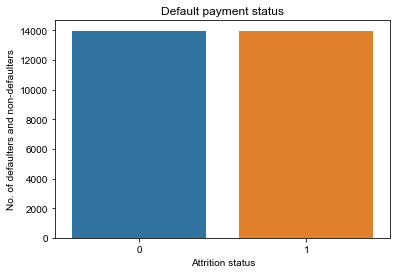

<Figure size 720x720 with 0 Axes>

In [35]:
sns.countplot(x='default payment next month',data=os_df_y)
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(10,10)})
plt.title("Default payment status")
plt.xlabel("Attrition status")
plt.ylabel("No. of defaulters and non-defaulters")
plt.figure(figsize=(10,10))

The target variable is now balanced and we can now move to the further analysis of the model.

PCA is affected by scaling. So, we scale the features in the data before applying PCA. It is better to scale both test and train X to be scaled using standard scaler. 

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
scaler.fit(X_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


StandardScaler()

In [51]:
# Applying transformation to both the training set and the test set instead of using fit_transform at once.
train_transformed = scaler.transform(X_train)
test_transformed = scaler.transform(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


We now move on to the most important part in the model, which is applying PCA to reduce the dimensions of feature set.

# Applying PCA

PCA is intialized with target variance of 95%

In [52]:
from sklearn.decomposition import PCA
pca = PCA(.95) #initializing pca

In [53]:
pca.fit(train_transformed)

PCA(n_components=0.95)

In [54]:
pca.n_components_

15

Hence, the technique of PCA has reduced the dimensions of feature set from 24 to 15. These 15 features will be enough to build the accurate model.

In [56]:
#Applying PCA transformation
train_new = pca.transform(train_transformed)
test_new = pca.transform(test_transformed)

The new/transformed feature sets are in terms of principle compoents.
Further, a **logistic regression** is fitted on this transformed data sets with 15 features instead of 24.

# LOGISTIC REGRESSION MODEL

In [57]:
from sklearn.linear_model import LogisticRegression
X1_train, X1_test, y1_train, y1_test = train_test_split(os_df_X,os_df_y, test_size=0.3, random_state=12)
logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

LogisticRegression()

In [59]:
#CHECKING THE ACCURACY OF FITTED MODEL

y_pred = logreg.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))

Accuracy of logistic regression classifier on test set: 0.62


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The accuracy given by **logistic regression** is 0.62.

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y_pred)
print(confusion_matrix)

[[2745 1452]
 [1750 2441]]


**The confusion matrix explains 5186 correct predictions and 3202 wrong predictions**.

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63      4197
           1       0.63      0.58      0.60      4191

    accuracy                           0.62      8388
   macro avg       0.62      0.62      0.62      8388
weighted avg       0.62      0.62      0.62      8388



C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


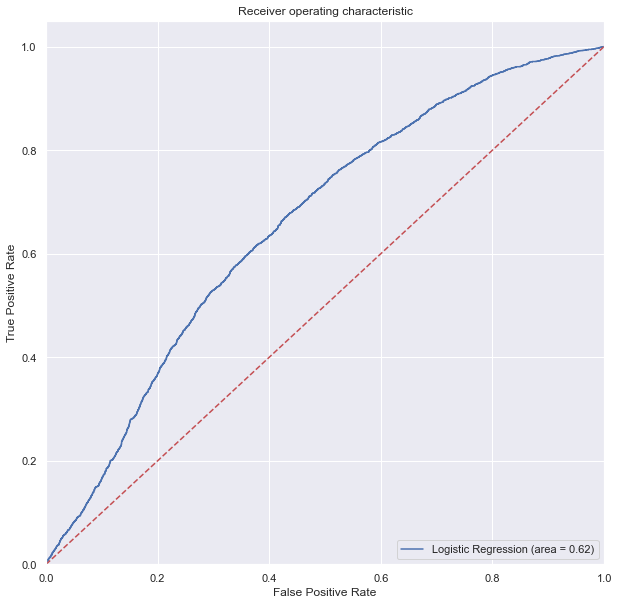

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y1_test, logreg.predict(X1_test)) #computes AUC under ROC
fpr, tpr, thresholds = roc_curve(y1_test, logreg.predict_proba(X1_test)[:,1]) #creates ROC 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- The dotted red line represents the ROC curve of a purely random classifier.
- A good classifier stays as far away from that line as possible (towards the top-left corner).
- The AUC is 0.62, indicating an average good value for a binary classifier.

To check the results of **logistic regression** model, we also build a **Linear Discrimininant Analysis (LDA)** and **Quadratic Discrimininant Analysis (QDA)** models and compare the accuracy to comment on the best model for this dataset.  

# LDA MODEL

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X1_train,y1_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [70]:
y_pred = lda.predict(X1_test)
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X1_test, y1_test)))

Accuracy of LDA classifier on test set: 0.68


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The model accuracy given by **LDA** is 0.68 or 68%. 

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y_pred)
print(confusion_matrix)

[[ 889 3308]
 [ 333 3858]]


**The confusion matrix explains 5694 correct predictions and 2694 wrong predictions**.

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69      4197
           1       0.70      0.63      0.66      4191

    accuracy                           0.68      8388
   macro avg       0.68      0.68      0.68      8388
weighted avg       0.68      0.68      0.68      8388



C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


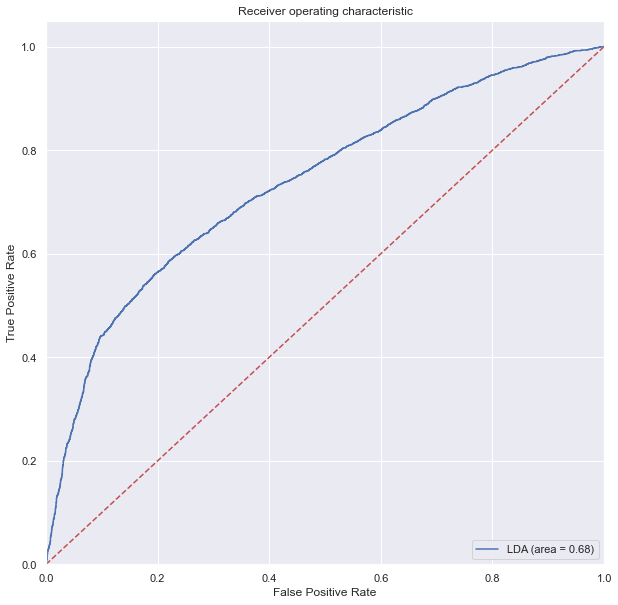

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lda_roc_auc = roc_auc_score(y1_test, lda.predict(X1_test)) #computes AUC under ROC
fpr, tpr, thresholds = roc_curve(y1_test, lda.predict_proba(X1_test)[:,1]) #creates ROC 
plt.figure()
plt.plot(fpr, tpr, label='LDA (area = %0.2f)' % lda_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LDA_ROC')
plt.show()

The AUC is 0.68, indicating an average good value for a binary classifier.

# QDA MODEL

In [69]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X1_train,y1_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis()

In [72]:
y_pred = qda.predict(X1_test)
print('Accuracy of QDA classifier on test set: {:.2f}'.format(qda.score(X1_test, y1_test)))

Accuracy of QDA classifier on test set: 0.57


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The model accuracy given by **QDA** is 0.57 or 57%. 

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y_pred)
print(confusion_matrix)

[[ 889 3308]
 [ 333 3858]]


**The confusion matrix explains 4474 correct predictions and 3641 wrong predictions**.

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.21      0.33      4197
           1       0.54      0.92      0.68      4191

    accuracy                           0.57      8388
   macro avg       0.63      0.57      0.50      8388
weighted avg       0.63      0.57      0.50      8388



C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


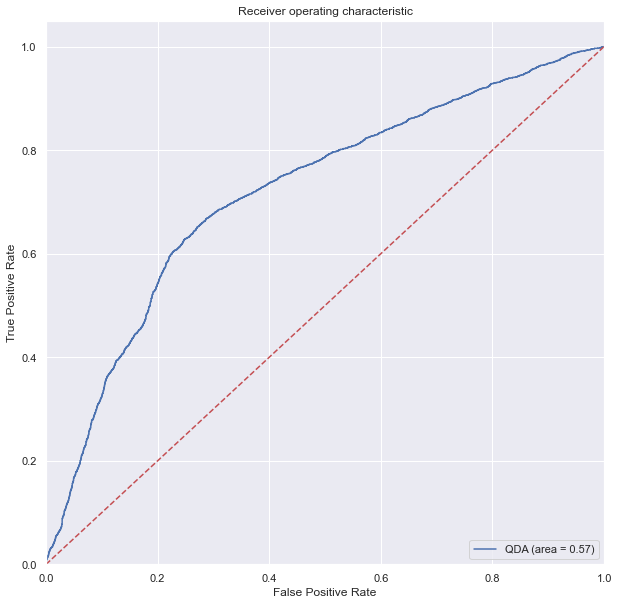

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
qda_roc_auc = roc_auc_score(y1_test, qda.predict(X1_test)) #computes AUC under ROC
fpr, tpr, thresholds = roc_curve(y1_test, qda.predict_proba(X1_test)[:,1]) #creates ROC 
plt.figure()
plt.plot(fpr, tpr, label='QDA (area = %0.2f)' % qda_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('QDA_ROC')
plt.show()

The AUC is 0.57, indicating an average good value for a binary classifier.

# CONCLUSIONS

- PCA (Principal Component Analysis) takes advantage of multicollinearity and combines the highly correlated variables into a set of uncorrelated variables. Therefore, it effectively **eliminates multicollinearity** between features.


- Principal Component Analysis (PCA), which is similar to Recursive Feature Elimination (RFE) has been applied here to reduce the dimensions of the feature set in the dataset.


- On applying PCA, the feature set reduces from 24 to 15, which affect the target variable, the most.


- The tranformed variables of feature set are then fitted into 3 models, namely **Logistic Regression, Lindear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA)** to compare the accuracy measures of the three models and select the best model for the given dataset.


- LDA predicts **most of the observations correctly** with a low count of observations predicted wrongly. The accuracy measure  of LDA model **(68%)** is also the best as compared to the other two models. The Confusion matrix also gives better results of **precision and recall** in the case of LDA. Finaly, the **Area Under Curve (AUC)** is also the highest in LDA model. 


**Hence, we can conclude that for the given dataset, LDA is the best fitted model with high accuracy, precision and recall. This may be due to the fact that LDA works better with large dataset having multiple classes**.